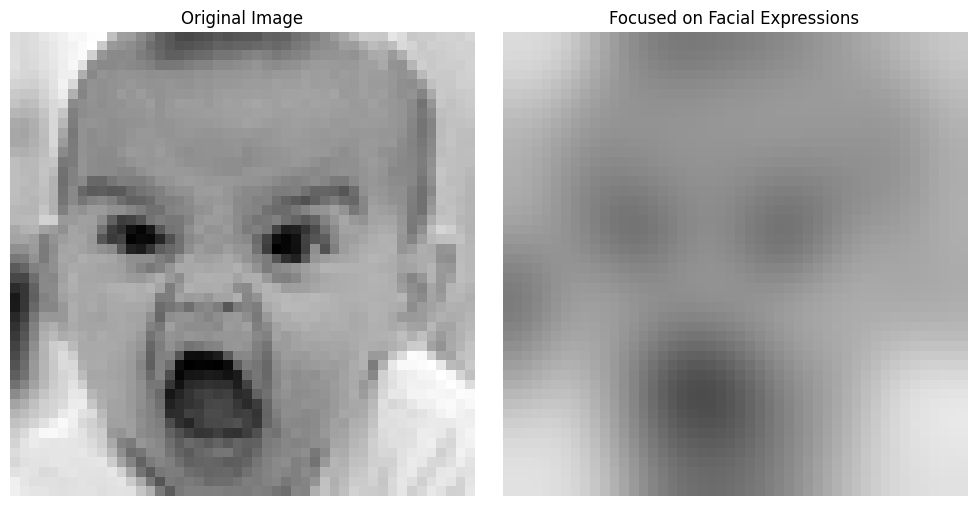

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/Training_143373.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Create a mask for the face region
mask = np.zeros_like(image)
for (x, y, w, h) in faces:
    # Draw a filled rectangle over the face region on the mask
    mask[y:y+h, x:x+w] = image[y:y+h, x:x+w]

# Apply Gaussian blur to the entire image
blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

# Combine the blurred image and the original image using the mask
# Keeps the face region sharp, and the rest is blurred
focus_image = np.where(mask > 0, image, blurred_image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Focused on Facial Expressions')
plt.imshow(cv2.cvtColor(focus_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
